<a href="https://colab.research.google.com/github/hobbit0701/hobbit/blob/main/HW03_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HW03 Data Analysis




## 標題：學生習慣和學習表現分析

## 摘要

本報告基於 **Kaggle** 上的 **Student Habits vs Academic Performance** 資料進行,學習時間和考試成績之間的關係,課程參與和考試成績之間的關係,不同父母學歷對孩子考試成績的影響,不同心理健康評分的考試成績分布,不同性別的考試成績高低情形。

## 引言

### 目的
本研究的目標是透過數據分析，找出影響學生成績的主要因素，並提供可行的見解來幫助學生提升課業能力。

### 待答問題
1. 課外活動是否影響課業表現？
2. 心理健康是否和學習表現有關係？
3. 不同性別的學生，成績表現是否有顯著差異？

## 方法

### 數據來源
本研究使用 [Kaggle](https://www.kaggle.com/datasets/jayaantanaath/student-habits-vs-academic-performance)上的學生學習習慣和表現資料進行分析

### 分析工具
- **Python**（數據處理與分析）
- **Pandas**（數據清理與統計分析）
- **Matplotlib / Seaborn**（數據視覺化）

### 數據處理
1. 載入[Kaggle](https://www.kaggle.com/datasets/jayaantanaath/student-habits-vs-academic-performance) 數據集並檢視數據概況。
2. 探討數據間的相關性
3. 繪製散點圖、盒狀圖等，分析關鍵變數之間的關係。


匯入資料


In [14]:
!wget -O taipei_sans_tc_beta.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download

--2025-06-11 09:16:42--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 74.125.196.139, 74.125.196.113, 74.125.196.102, ...
Connecting to drive.google.com (drive.google.com)|74.125.196.139|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_ [following]
--2025-06-11 09:16:42--  https://drive.usercontent.google.com/download?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 74.125.134.132, 2607:f8b0:400c:c00::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|74.125.134.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20659344 (20M) [application/octet-stream]
Saving to: ‘taipei_sans_tc_beta.ttf’

taipei_sans_tc_beta 100%[===================>]  19.70M  65.5MB/s    in 0.3s    

2025-06-11 09:16:48 (6

In [15]:
import matplotlib
import matplotlib.pyplot as plt
# 新增字體
matplotlib.font_manager.fontManager.addfont('taipei_sans_tc_beta.ttf')
# 設定中文字型及負號正確顯示
plt.rcParams['font.sans-serif'] = 'Taipei Sans TC Beta'
plt.rcParams["axes.unicode_minus"] = False

In [57]:
import pandas as pd

df = pd.read_csv("student_habits_performance.csv")
df.head()

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   student_id                     1000 non-null   object 
 1   age                            1000 non-null   int64  
 2   gender                         1000 non-null   object 
 3   study_hours_per_day            1000 non-null   float64
 4   social_media_hours             1000 non-null   float64
 5   netflix_hours                  1000 non-null   float64
 6   part_time_job                  1000 non-null   object 
 7   attendance_percentage          1000 non-null   float64
 8   sleep_hours                    1000 non-null   float64
 9   diet_quality                   1000 non-null   object 
 10  exercise_frequency             1000 non-null   int64  
 11  parental_education_level       909 non-null    object 
 12  internet_quality               1000 non-null   ob

## 結果與分析

### 相關性分析


In [59]:
corr = df[['study_hours_per_day','exam_score','mental_health_rating','exercise_frequency']].corr()

<Axes: >

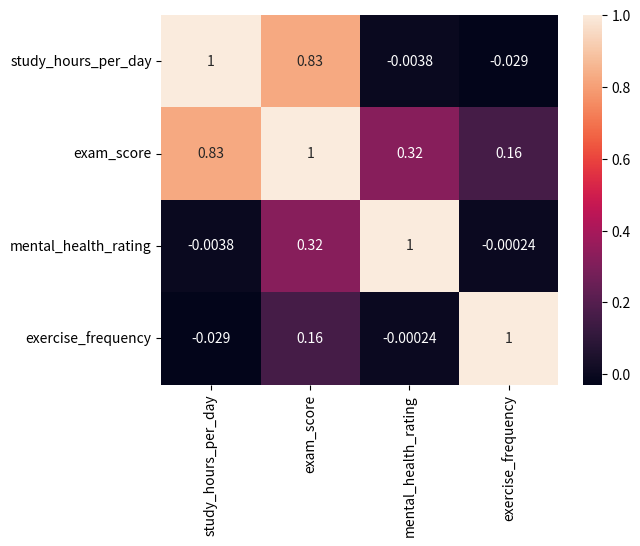

In [60]:
sns.heatmap(corr,annot=True)

 **結論**:可以看讀書時間長短和考試成績有高度正相關

###學習時間和考試成績之間的關係

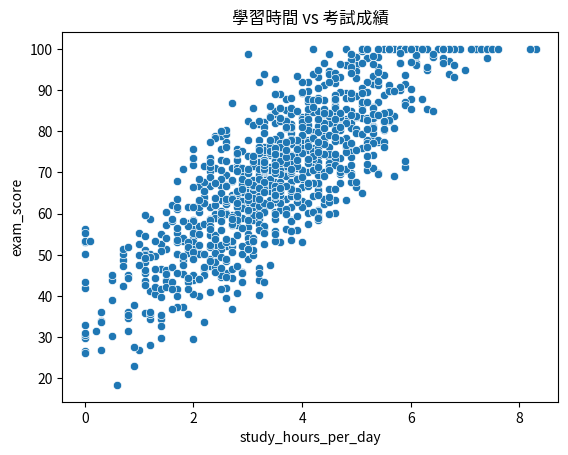

In [61]:
import seaborn as sns
sns.scatterplot(data=df, x='study_hours_per_day', y='exam_score')
plt.title("學習時間 vs 考試成績")
plt.show()


**分析結果**：從圖中可知較長的每日讀書時間，相對能拿到較高的成績

###課程參與和考試成績之間的關係

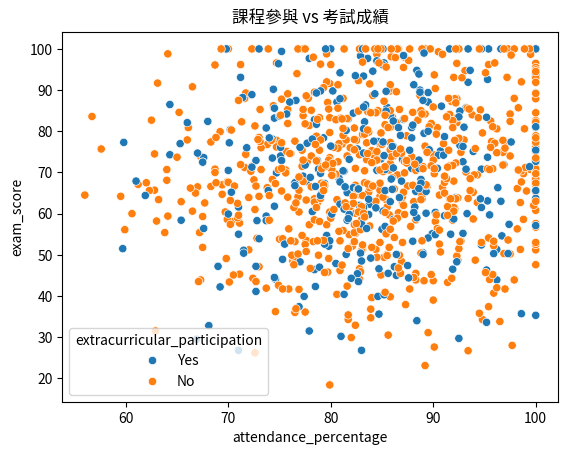

In [67]:
sns.scatterplot(data=df, x='attendance_percentage', y='exam_score',hue='extracurricular_participation')
plt.title("課程參與 vs 考試成績")
plt.show()

**分析結果**：學習參與比例越高，相對能拿到較高的成績,也看出有無課外活動並不直接影響課業表現

### 不同父母學歷對孩子考試成績的影響

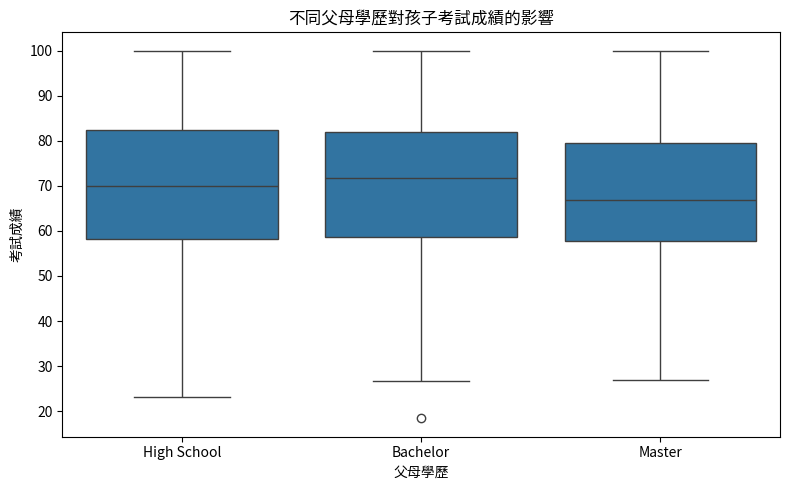

In [66]:
from pandas.api.types import CategoricalDtype
edu_order = ['High School', 'Bachelor', 'Master']
edu_type = CategoricalDtype(categories=edu_order, ordered=True)
df['parental_education_level'] = df['parental_education_level'].astype(edu_type)
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='parental_education_level', y='exam_score')
plt.title("不同父母學歷對孩子考試成績的影響")
plt.xlabel("父母學歷")
plt.ylabel("考試成績")
plt.tight_layout()
plt.show()

**分析結果**：原本認為父母學歷，會影響小孩成績，但在這組資料無法證明這個假說

### 不同心理健康評分的考試成績分布

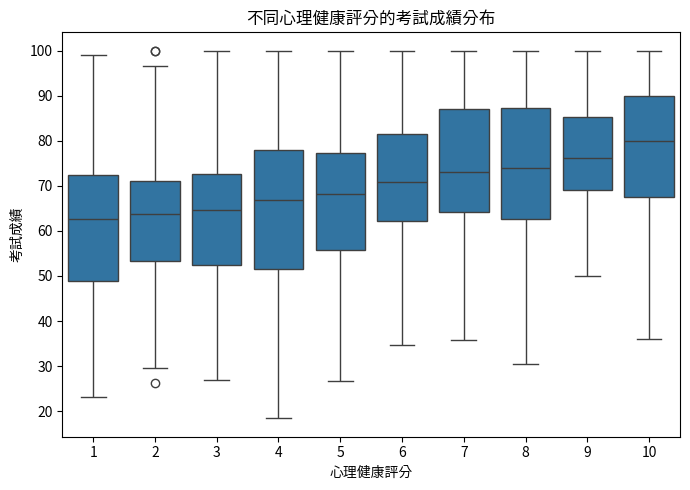

In [55]:
plt.figure(figsize=(7, 5))
sns.boxplot(data=df, x='mental_health_rating', y='exam_score')
plt.title("不同心理健康評分的考試成績分布")
plt.xlabel("心理健康評分")
plt.ylabel("考試成績")
plt.tight_layout()
plt.show()


**分析結果**：心理健康評分越高，越能在學業上獲得好成績

### 不同性別的考試成績高低情形
我們比較不同性別的學生考試成績之差別，使用盒狀圖進行分析。

<Figure size 800x600 with 0 Axes>

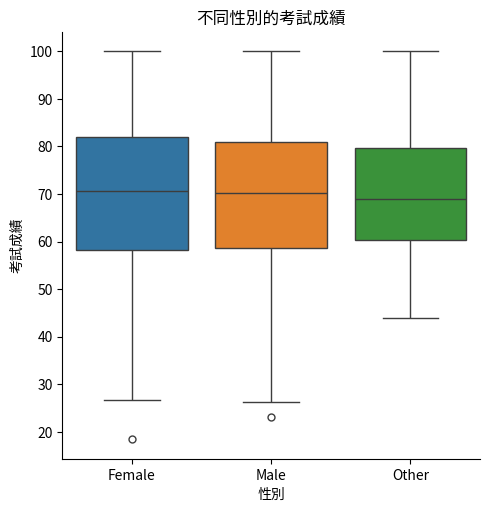

In [50]:
plt.figure(figsize=(8, 6))
sns.catplot(data=df, x='gender', y='exam_score',kind='box',hue='gender')
plt.title("不同性別的考試成績")
plt.xlabel("性別")
plt.ylabel("考試成績")
plt.show()

**分析結果**：
- 無明顯證據顯示性別對成績分布產生影響

## 結論與建議


### 結論
1. 讀書時間而參與度和成績表現有明顯正向關係。
2. 心理健康程度和學生成績有顯著影響。
3. 男性與女性的成績分佈類似，並無直接差異。

### 建議
1. 學校可以多關心學生心理健康，進而提升學習表現。
2. 改變教學方式，使學生更喜愛參與課堂。

